In [1]:

import torch
from binNF.normalizing_flows.manager import *
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def gaussian(x):
    return torch.exp( -torch.sum((x-0.5)**2,axis=-1)/0.3**2 )

def con(x):
    y=torch.empty(x.shape[0])
    return y.fill_(5)


In [3]:
n_flow = 2      # number of dimensions


# We define our NormalizingFlow object 
NF =  AffineManager(n_flow=n_flow)



In [4]:
#The model is created
NF.create_model(n_pass_through=1,n_cells=1, nn_width=2, NN=[20,5,20], roll_step=1)
optim = torch.optim.Adamax(NF.model.parameters(),lr=1e-3, weight_decay=0) 


0.NN.0.weight tensor([[-0.2853],
        [ 0.9199],
        [ 0.8565],
        [ 0.1262],
        [-0.3636],
        [-0.5909],
        [ 0.2491],
        [ 0.5758],
        [ 0.9579],
        [-0.2255],
        [-0.1652],
        [ 0.1145],
        [ 0.5401],
        [ 0.9394],
        [ 0.6539],
        [-0.9741],
        [-0.1880],
        [-0.0426],
        [ 0.7554],
        [-0.4433]]) True
0.NN.0.bias tensor([ 0.0181,  0.8698, -0.5194,  0.3641, -0.2087, -0.8449, -0.7960,  0.0415,
        -0.3076, -0.7879, -0.5732,  0.4127, -0.1656,  0.1082,  0.1439, -0.4124,
        -0.4373, -0.1784, -0.3054, -0.4180]) True
0.NN.2.weight tensor([[-0.1957,  0.0144,  0.1865, -0.1965,  0.0358, -0.0523,  0.0675,  0.1106,
         -0.0596,  0.0327,  0.1693, -0.0761,  0.1344, -0.0860, -0.0065, -0.0215,
          0.0297, -0.0304, -0.1441,  0.0728],
        [ 0.1889, -0.0535,  0.0716, -0.1042, -0.1234,  0.0868, -0.0122, -0.0309,
          0.0119,  0.1767, -0.0480,  0.1241,  0.1050, -0.0526,  0.1654,  0.

In [5]:
history = NF._train_variance_forward(con,epochs=500,batch_size=50000,optimizer_object=optim, logdir="./logs/tmp/")


1265451.75


/home/niklas/miniconda3/envs/cs231n/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


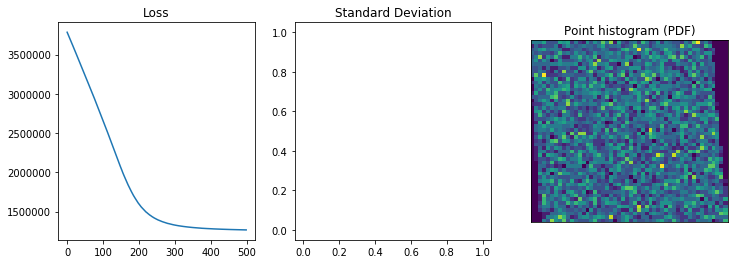

In [6]:
losses=[]
for key, value in history.items():
    losses.append(value["loss"])

fig = plt.figure(figsize=(12, 4))
a1=fig.add_subplot(131)
plt.plot(losses)
print(min(losses))
a1.title.set_text('Loss')
a2=fig.add_subplot(132)
plt.plot(np.sqrt(np.exp(losses)))
a2.title.set_text('Standard Deviation')

w = torch.empty((10000,2)) 
torch.nn.init.uniform_(w)

w=NF.format_input(w)

X=NF.model(w).data.numpy()

a3=fig.add_subplot(133)
plt.hist2d(X[:,0],X[:,1],bins=50)
a3.set_aspect(aspect=1.)
a3.title.set_text('Point histogram (PDF)')
a3.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)




In [7]:
w = torch.empty(10000, NF.n_flow, requires_grad=True)
torch.nn.init.uniform_(w,0,1)

print("W")
print(w)
                    #print(self.format_input(w).requires_grad)
print("with jacob")                  # Output a sample of (phase-space point, forward Jacobian)
print(NF.format_input(w))
XJ = NF.model(NF.format_input(w))

                    # Separate the points and their Jacobians:
print("XJ")
print(XJ)# This sample is fixed, we optimize the Jacobian
X = ((XJ[:, :-1]).detach())
print("X")
print(X)

print("f(x)")
print(con(X))

print("fXJ")
print(torch.mul(con(X), XJ[:, -1]))
print("reset")
NF.create_model(n_pass_through=1,n_cells=1, nn_width=2, NN=[20,20,20], roll_step=1)

w = torch.empty(10000, NF.n_flow, requires_grad=True)
torch.nn.init.uniform_(w,0,1)

print("W")
print(w)
                    #print(self.format_input(w).requires_grad)
print("with jacob")                  # Output a sample of (phase-space point, forward Jacobian)
print(NF.format_input(w))
XJ = NF.model(NF.format_input(w))

                    # Separate the points and their Jacobians:
print("XJ")
print(XJ)# This sample is fixed, we optimize the Jacobian
X = ((XJ[:, :-1]).detach())
print("X")
print(X)

print("f(x)")
print(con(X))

print("fXJ")
print(torch.mul(con(X), XJ[:, -1]))

W
tensor([[0.1201, 0.9180],
        [0.3369, 0.1845],
        [0.8293, 0.2339],
        ...,
        [0.9650, 0.1917],
        [0.3599, 0.0649],
        [0.7264, 0.2298]], requires_grad=True)
with jacob
tensor([[0.1201, 0.9180, 1.0000],
        [0.3369, 0.1845, 1.0000],
        [0.8293, 0.2339, 1.0000],
        ...,
        [0.9650, 0.1917, 1.0000],
        [0.3599, 0.0649, 1.0000],
        [0.7264, 0.2298, 1.0000]], grad_fn=<CatBackward>)
XJ
tensor([[1.3725, 0.1201, 1.0169],
        [0.6095, 0.3369, 1.0059],
        [0.6235, 0.8293, 1.0005],
        ...,
        [0.5720, 0.9650, 1.0002],
        [0.4876, 0.3599, 1.0053],
        [0.6267, 0.7264, 1.0008]], grad_fn=<CatBackward>)
X
tensor([[1.3725, 0.1201],
        [0.6095, 0.3369],
        [0.6235, 0.8293],
        ...,
        [0.5720, 0.9650],
        [0.4876, 0.3599],
        [0.6267, 0.7264]])
f(x)
tensor([5., 5., 5.,  ..., 5., 5., 5.])
fXJ
tensor([5.0843, 5.0296, 5.0023,  ..., 5.0011, 5.0263, 5.0039],
       grad_fn=<MulBackward0>

In [29]:
for name, param in NF.model.named_parameters():
    print (name, param.data, param.requires_grad)

0.NN.0.weight tensor([[ 0.1116],
        [-0.0387],
        [ 0.3578],
        [ 0.7651],
        [-0.7277]]) True
0.NN.0.bias tensor([ 1.0353,  0.9534,  0.2310,  0.5386, -0.1639]) True
0.NN.2.weight tensor([[ 0.1084, -0.0408,  0.7272,  0.7484,  0.2530],
        [ 0.5224,  0.3947,  0.4491, -0.0961,  0.0653],
        [-0.0135,  0.5671,  0.2839,  0.5571,  0.1864],
        [ 0.5418,  0.1180,  0.8486,  0.5797,  0.4172],
        [ 0.7296,  0.6251, -0.1409,  0.5369, -0.4113]]) True
0.NN.2.bias tensor([ 0.6872,  0.5182,  0.1475, -0.0476,  0.6494]) True
0.NN.4.weight tensor([[ 0.0330,  0.2465, -0.1613,  0.1293, -0.3344],
        [ 0.0649,  0.7305,  0.7565,  0.7084,  0.5137],
        [-0.1068,  0.3498,  0.3618,  0.2069,  0.4262],
        [ 0.7759,  0.2592,  0.2108,  0.7214,  0.5042],
        [-0.2300, -0.3491,  0.1569, -0.0784, -0.2705]]) True
0.NN.4.bias tensor([0.3389, 0.4174, 0.2853, 0.5179, 0.1786]) True
0.NN.6.weight tensor([[-0.3977,  0.1800, -0.0533, -0.3827, -0.2129],
        [ 0.2211, 